In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [396]:
churn_df = pd.read_csv("CustomerInformation.csv")
churn_df.head()

,Customer_ID,Customer_PurchaseChannelGroup,Customer_MembershipType,Customer_LoyaltyStatus,FirstTransactionDate,LastTransactionDate,Tenure,Customer_OrderCount,OrderFrequency,LifeTimeValue,...,Home_Owner,Truck_Owner,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup,churn
0,5411859,StoreOnly,BBBP,Loyalty,12/7/2014 0:00,7/9/2021 0:00,79,19,4,684.47,...,Y,False,4,6,2,3,10,0,1,1
1,6281991,StoreOnly,GOLD,Loyalty,7/11/2015 0:00,11/15/2021 0:00,76,23,3,3858.75,...,NaN,False,20,10,9,0,10,0,1,1
2,151926,Omni,GOLD,Loyalty,10/2/2014 0:00,6/8/2022 0:00,92,57,1,5799.11,...,Y,False,19,69,1,5,17,0,0,0
3,6022208,StoreOnly,GOLD,Loyalty,4/19/2015 0:00,6/18/2022 0:00,86,39,2,3043.05,...,NaN,False,11,49,6,9,3,0,0,0
4,870105,StoreOnly,GOLD,Loyalty,10/21/2011 0:00,12/31/2021 0:00,122,44,2,2367.22,...,Y,False,12,32,2,1,20,0,0,1


In [397]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Customer_ID                    100000 non-null  int64  
 1   Customer_PurchaseChannelGroup  99972 non-null   object 
 2   Customer_MembershipType        100000 non-null  object 
 3   Customer_LoyaltyStatus         100000 non-null  object 
 4   FirstTransactionDate           100000 non-null  object 
 5   LastTransactionDate            100000 non-null  object 
 6   Tenure                         100000 non-null  int64  
 7   Customer_OrderCount            100000 non-null  int64  
 8   OrderFrequency                 100000 non-null  int64  
 9   LifeTimeValue                  100000 non-null  float64
 10  AOV                            100000 non-null  float64
 11  age                            100000 non-null  int64  
 12  Gender                         

In [399]:
## tenure: number of months the customer has stayed with the company
## AOV: average order value

categorical_features = [
"Customer_PurchaseChannelGroup",
"Customer_MembershipType",
"Customer_LoyaltyStatus",
"Gender",
"Children",
"Income_Updated",
"Home_Owner",
"Truck_Owner"]

numerical_features = ["Tenure", "Customer_OrderCount", "OrderFrequency", "LifeTimeValue", "AOV", 
"age", "Footwear", "Apparel", "Hats", "Gifts_Home", "Accessories", "Tack", "Misc_Startup"]

In [400]:
churn_df[numerical_features].describe()

,Tenure,Customer_OrderCount,OrderFrequency,LifeTimeValue,AOV,age,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000
mean,64.919890,20.767040,7.400790,2.357451e+03,129.809623,25.855020,9.894100,22.860450,2.93608,2.366110,10.02974,0.076020,0.356790
std,41.333745,99.044185,7.597357,1.472815e+04,73.972244,28.121478,75.941883,145.336972,9.89469,9.226444,52.33230,1.118094,3.027788
min,0.000000,1.000000,0.000000,-8.291040e+03,-465.940000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,28.000000,4.000000,2.000000,5.084175e+02,86.482500,0.000000,2.000000,1.000000,0.00000,0.000000,1.00000,0.000000,0.000000
50%,70.000000,10.000000,5.000000,1.154830e+03,116.482613,0.000000,5.000000,8.000000,1.00000,0.000000,5.00000,0.000000,0.000000
75%,101.000000,23.000000,10.000000,2.474530e+03,158.141250,53.000000,10.000000,25.000000,3.00000,2.000000,11.00000,0.000000,0.000000
max,134.000000,19667.000000,60.000000,2.921170e+06,4195.545000,94.000000,12081.000000,28941.000000,1482.00000,835.000000,12933.00000,79.000000,645.000000


In [401]:
# Step 1: Data Cleaning
# churn_df.quantile(q=0.95,axis=0,numeric_only=True,interpolation='linear')
print(churn_df['Customer_OrderCount'].quantile(q=0.95))
print(churn_df['LifeTimeValue'].quantile(q=0.95))
print(churn_df['AOV'].quantile(q=0.95))

63.0
6804.779999999998
252.35049999999987


In [402]:
# Filter unwanted outliers
churn_df = churn_df.drop(churn_df[churn_df['Customer_OrderCount'] > 63].index)
churn_df = churn_df.drop(churn_df[churn_df['LifeTimeValue'] <= 0].index)
churn_df = churn_df.drop(churn_df[churn_df['LifeTimeValue'] > 6805].index)
churn_df = churn_df.drop(churn_df[churn_df['AOV'] > 253].index)

In [403]:
# Deal with missing data
churn_df['Tenure'].replace(0,1, inplace=True)
churn_df['Customer_MembershipType'].replace("    ",np.nan, inplace=True)
churn_df['Gender'].replace(" ",np.nan, inplace=True)
churn_df['Gender'].replace("U",np.nan, inplace=True)
churn_df['Gender'].replace("A",np.nan, inplace=True)
churn_df['age'].replace(0,np.nan, inplace=True)
#churn_df['age'].fillna(churn_df['age'].mean(), inplace=True)

In [404]:
churn_df.isna().sum()

Customer_ID                          0
Customer_PurchaseChannelGroup       22
Customer_MembershipType            389
Customer_LoyaltyStatus               0
FirstTransactionDate                 0
LastTransactionDate                  0
Tenure                               0
Customer_OrderCount                  0
OrderFrequency                       0
LifeTimeValue                        0
AOV                                  0
age                              43549
Gender                           34763
Children                             0
Income_Updated                       0
Home_Owner                       42067
Truck_Owner                          0
Footwear                             0
Apparel                              0
Hats                                 0
Gifts_Home                           0
Accessories                          0
Tack                                 0
Misc_Startup                         0
churn                                0
dtype: int64

In [406]:
churn_df = churn_df.dropna(subset=['age'])
churn_df = churn_df.dropna(subset=['Gender'])

In [407]:
#process the date
import datetime
churn_df['LastTransactionYear'] = pd.DatetimeIndex(churn_df['LastTransactionDate']).year

<AxesSubplot:xlabel='churn', ylabel='age'>

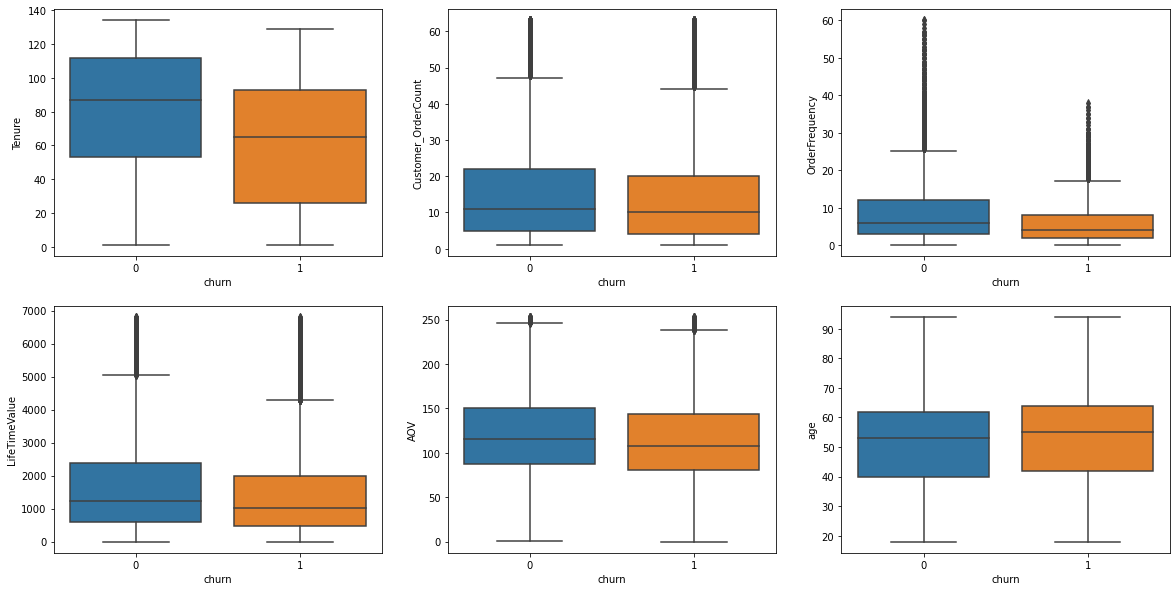

In [408]:
_,axss = plt.subplots(2,3,figsize = [20,10])
sns.boxplot(x='churn', y='Tenure',data=churn_df,ax=axss[0][0])
sns.boxplot(x='churn', y='Customer_OrderCount',data=churn_df,ax=axss[0][1])
sns.boxplot(x='churn', y='OrderFrequency',data=churn_df,ax=axss[0][2])
sns.boxplot(x='churn', y='LifeTimeValue',data=churn_df,ax=axss[1][0])
sns.boxplot(x='churn', y='AOV',data=churn_df,ax=axss[1][1])
sns.boxplot(x='churn', y='age',data=churn_df,ax=axss[1][2])

In [175]:
'''
_,axss = plt.subplots(2,3,figsize = [20,10])
sns.boxplot(x='churn', y='Footwear',data=churn_df,ax=axss[0][0])
sns.boxplot(x='churn', y='Apparel',data=churn_df,ax=axss[0][1])
sns.boxplot(x='churn', y='Hats',data=churn_df,ax=axss[0][2])
sns.boxplot(x='churn', y='Gifts_Home',data=churn_df,ax=axss[1][0])
sns.boxplot(x='churn', y='Accessories',data=churn_df,ax=axss[1][1])
sns.boxplot(x='churn', y='Misc_Startup',data=churn_df,ax=axss[1][2])
'''

"\n_,axss = plt.subplots(2,3,figsize = [20,10])\nsns.boxplot(x='churn', y='Footwear',data=churn_df,ax=axss[0][0])\nsns.boxplot(x='churn', y='Apparel',data=churn_df,ax=axss[0][1])\nsns.boxplot(x='churn', y='Hats',data=churn_df,ax=axss[0][2])\nsns.boxplot(x='churn', y='Gifts_Home',data=churn_df,ax=axss[1][0])\nsns.boxplot(x='churn', y='Accessories',data=churn_df,ax=axss[1][1])\nsns.boxplot(x='churn', y='Misc_Startup',data=churn_df,ax=axss[1][2])\n"

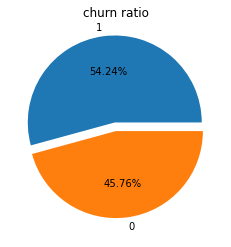

In [409]:
plt.pie(churn_df['churn'].value_counts(),labels=churn_df['churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('churn ratio')
plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

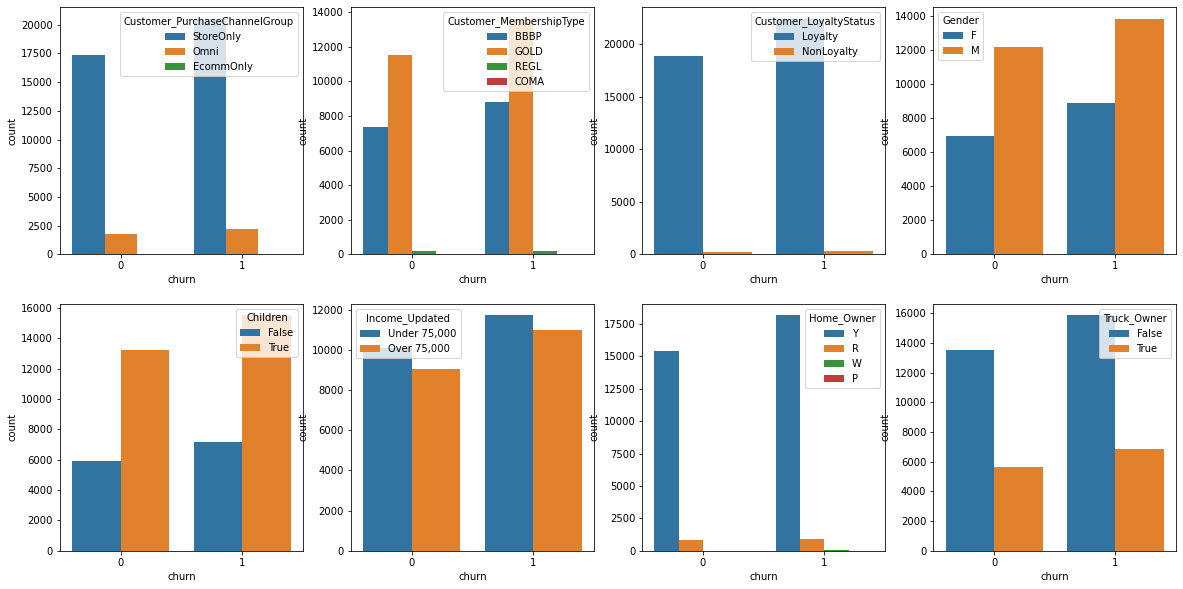

In [410]:
_,axss = plt.subplots(2,4,figsize = [20,10])
sns.countplot(x='churn', hue='Customer_PurchaseChannelGroup', data=churn_df,ax = axss[0][0])
sns.countplot(x='churn', hue='Customer_MembershipType', data=churn_df,ax = axss[0][1])
sns.countplot(x='churn', hue='Customer_LoyaltyStatus', data=churn_df,ax = axss[0][2])
sns.countplot(x='churn', hue='Gender', data=churn_df,ax = axss[0][3])
sns.countplot(x='churn', hue='Children', data=churn_df,ax = axss[1][0])
sns.countplot(x='churn', hue='Income_Updated', data=churn_df,ax = axss[1][1])
sns.countplot(x='churn', hue='Home_Owner', data=churn_df,ax = axss[1][2])
sns.countplot(x='churn', hue='Truck_Owner', data=churn_df,ax = axss[1][3])


<AxesSubplot:>

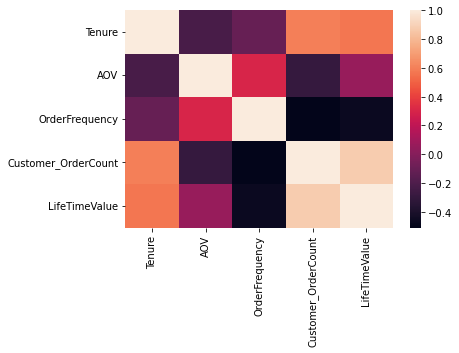

In [411]:
corr_score = churn_df[["Tenure", "AOV", "OrderFrequency", "Customer_OrderCount", "LifeTimeValue"]].corr()
sns.heatmap(corr_score)

In [412]:
X = churn_df.drop(['Customer_ID','Customer_PurchaseChannelGroup','Customer_MembershipType','Customer_LoyaltyStatus',
'FirstTransactionDate','LastTransactionDate',
'Children','Income_Updated','Home_Owner','Truck_Owner',
'churn'],axis=1)

y = churn_df["churn"]

In [413]:
# split data into training and testing 
# The random state hyperparameter in the train_test_split() function controls the shuffling process.
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25, stratify=y, random_state=42)
 
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 31398 observation with 15 features
test data has 10466 observation with 15 features


In [394]:
# One hot encoding
'''
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df,enc,categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(),columns=enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True),transformed],axis=1).drop(categories,axis=1)

categories = ['Gender']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train,enc_ohe,categories)
X_test = OneHotEncoding(X_test,enc_ohe,categories)
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\ndef OneHotEncoding(df,enc,categories):\n    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(),columns=enc.get_feature_names(categories))\n    return pd.concat([df.reset_index(drop=True),transformed],axis=1).drop(categories,axis=1)\n\ncategories = ['Gender']\nenc_ohe = OneHotEncoder()\nenc_ohe.fit(X_train[categories])\n\nX_train = OneHotEncoding(X_train,enc_ohe,categories)\nX_test = OneHotEncoding(X_test,enc_ohe,categories)\n"

In [414]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [415]:
X_train.head()

,Tenure,Customer_OrderCount,OrderFrequency,LifeTimeValue,AOV,age,Gender,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup,LastTransactionYear
81527,117,32,3,1644.04,51.376250,76.0,1.0,2,50,2,2,20,0,1,2021
55745,67,11,6,1347.26,122.478181,36.0,1.0,8,14,0,7,5,0,0,2019
85253,95,13,7,2495.50,191.961538,43.0,1.0,11,35,3,2,25,0,3,2020
73138,52,9,5,578.03,64.225555,55.0,1.0,1,11,1,1,1,0,0,2022
78587,75,31,2,5254.97,169.515161,30.0,1.0,22,7,3,0,10,0,0,2022


In [416]:
# model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [417]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [418]:
# Random Forest
classifier_RF = RandomForestClassifier()

In [419]:
# find optimal hyperparameters for random forest
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(random_state=41),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=41),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [420]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9125741096344807
Best parameters set:
max_depth:10
n_estimators:100


In [421]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [425]:
best_RF_model.predict_proba(X_test)

array([[0.11693338, 0.88306662],
       [0.97606392, 0.02393608],
       [0.8060964 , 0.1939036 ],
       ...,
       [0.92288101, 0.07711899],
       [0.87937438, 0.12062562],
       [0.03727794, 0.96272206]])

In [390]:
from sklearn.metrics import roc_curve
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
y_pred_rf

array([0.88306662, 0.02393608, 0.1939036 , ..., 0.07711899, 0.12062562,
       0.96272206])

In [426]:
df_test = pd.DataFrame(X_test)
df_test['churn'] = y_test
df_test['probability'] = y_pred_rf
df_test

,Tenure,Customer_OrderCount,OrderFrequency,LifeTimeValue,AOV,age,Gender,Footwear,Apparel,Hats,Gifts_Home,Accessories,Tack,Misc_Startup,LastTransactionYear,churn,probability
81640,76,6,12,368.46,61.410000,74.0,1.0,1,3,0,0,1,0,0,2020,1,0.883067
77108,103,6,17,1222.60,203.766666,65.0,1.0,3,4,2,0,1,0,0,2022,0,0.023936
35182,48,14,3,1465.09,104.649285,59.0,0.0,12,2,0,1,8,0,0,2022,0,0.193904
13446,101,22,4,1321.50,60.068181,54.0,1.0,1,2,0,0,44,0,0,2021,1,0.857274
14025,1,1,24,129.99,129.990000,44.0,0.0,1,0,0,0,0,0,0,2021,0,0.102779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35237,84,15,5,958.23,63.882000,33.0,0.0,4,15,1,4,10,0,0,2022,0,0.090576
86336,110,14,7,1636.05,116.860714,74.0,0.0,10,16,2,10,7,0,0,2022,0,0.090891
55435,62,13,4,1998.03,153.694615,62.0,0.0,7,14,2,0,3,0,0,2022,0,0.077119
41043,21,2,10,219.98,109.990000,48.0,1.0,3,0,0,0,1,0,0,2022,0,0.120626


In [427]:
#Random Forest Model - Feature Importance Discussion
# check feature importance of random forest for feature selection
X_RF = X.copy()
#X_RF = OneHotEncoding(X_RF, enc_ohe, ['Gender'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
LastTransactionYear : 0.5177
OrderFrequency : 0.1074
Tenure : 0.0914
LifeTimeValue : 0.0506
AOV : 0.0417
Customer_OrderCount : 0.0384
age : 0.0346
Apparel : 0.0283
Accessories : 0.0251
Footwear : 0.0234
Hats : 0.0153
Gifts_Home : 0.0133
Gender : 0.0059
Misc_Startup : 0.0058
Tack : 0.0011


In [ ]:
# logistic regression 
classifier_logistic = LogisticRegression(max_iter=100000)
classifier_logistic.fit(X_train, y_train)

In [ ]:
#Find Optimal Hyperparameters - LogisticRegression

# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10,100)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

In [ ]:
# the best hyperparameter combination
# C = 5/lambda
print_grid_search_metrics(Grid_LR)
# best model
best_LR_model = Grid_LR.best_estimator_
best_LR_model.predict_proba(X_test)